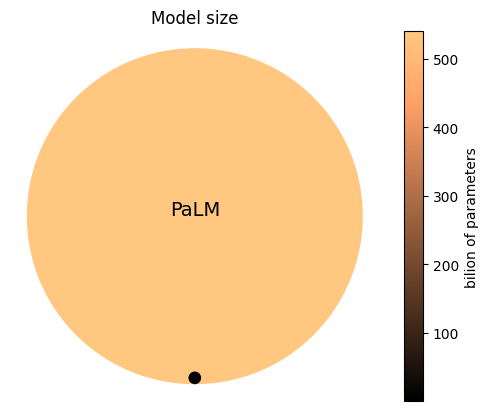

In [ ]:
#code inspired by here: https://stackoverflow.com/questions/59266060/how-to-do-a-nested-proportional-area-chart-circles
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection


def nested_circles(data, labels=None, c=None, ax=None,
                   cmap=None, norm=None, textkw={}):
    ax = ax or plt.gca()
    data = np.array(data)
    R = np.sqrt(data/data.max())
    p = [plt.Circle((0,r), radius=r) for r in R[::-1]]
    arr = data[::-1] if c is None else np.array(c[::-1])
    col = PatchCollection(p, cmap=cmap, norm=norm, array=arr)

    ax.add_collection(col)
    ax.axis("off")
    ax.set_aspect("equal")
    ax.autoscale()

    if labels is not None:
        kw = dict(color="white", va="center", ha="center")
        kw.update(textkw)
        ax.text(0, R[0], labels[0], **kw)
        for i in range(1, len(R)):
            ax.text(0, R[i]+R[i-1], labels[i], **kw)
    return col

data = [0.77, 540]
labels = ['','PaLM']
models = nested_circles(data, labels=labels, cmap="copper", textkw=dict(color="black", fontsize=14))
plt.title("Model size")
plt.colorbar(models, label="bilion of parameters")
plt.show()